<a href="https://colab.research.google.com/github/NikitaLokhande25/AI-based-Innovation-and-Product-Development/blob/main/AIPD_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment No. : 05**

**Name:** Nikita Pravin Lokhande.

**Roll No:** 23107070.

**Batch:** A.

**5(1) Statement :** Implement a simple AI analysis model in python and analyze how bias training data affect model prediction.\
1.Experience [2, 5,3,7,1,6,4,8]\
2.Gender [0,0,0,0,1,1,1,1]\
3.Hired [1,1,1,1,1,0,0,0,0]\
Test the candidate a femal with 5 years experience predice whether she will be hired or not

In [ ]:
# Given :
experience = [2, 5,3,7,1,6,4,8]
gender = [0,0,0,0,1,1,1,1]
hired = [1,1,1,1,1,0,0,0,0]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data ={'experience':[2, 5, 3, 7, 1, 6, 4, 8],
'Gender':[0, 0, 0, 0, 1, 1, 1, 1], #0=Female,1 =Male
'Hired':[1, 1, 1, 1, 1, 0, 0, 0]}#1= Hired, 0 = Not Hired

In [ ]:
df = pd.DataFrame(data)
df

,experience,Gender,Hired
0,2,0,1
1,5,0,1
2,3,0,1
3,7,0,1
4,1,1,1
5,6,1,0
6,4,1,0
7,8,1,0


In [ ]:
# Combine features (Experience + Gender)
x = np.column_stack((experience, gender))
y = hired

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
y = df['Hired'].values # Correcting y to have 8 samples, matching x
model.fit(x, y)

LogisticRegression()

In [ ]:
#Given Test Case- Female candidate with 5 years experience
test_candidate = np.array([[5, 0]])  #[Experience, Gender]

In [ ]:
prediction = model.predict(test_candidate)
probability = model.predict_proba(test_candidate)

In [ ]:
print("Prediction (0= Not Hired, 1= Hired):",prediction[0])
print("Probability of Not Hired and Hired:",probability[0])

Prediction (0= Not Hired, 1= Hired): 1
Probability of Not Hired and Hired: [0.28290398 0.71709602]


**5(2) Statement :** Business Model Development for AI Products.

Create a Business Model Canvas for an AI-based product. Define the value proposition,customer segments, revenue streams, and cost structures. Ethical Challenges in AI. Analyze a real-world AI application (e.g.,AI bias in
hiring) and discuss the ethical challenges involved. Propose solutions to mitigate risks and
ensure responsible AI usage.

In [ ]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("Job_Placement_Data_Enhanced.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,3,98,1,0,94,Mid,Medium
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4,88,1,1,54,MNC,Low
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,2,41,1,1,82,Startup,Low
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,4,41,0,0,50,MNC,High
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,4,67,0,0,67,Mid,High


In [26]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status', 'years_experience', 'skills_match_percent',
       'num_certifications', 'internship_completed', 'interview_score',
       'company_tier', 'job_competition_level'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [31]:
x = df.drop("status", axis=1)
y = df["status"]

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Model Accuracy: 0.8769230769230769
Confusion Matrix:
 [[16  5]
 [ 3 41]]


In [38]:
#Calculate Selection Rate :

# Add predictions to test set
x_test_copy = x_test.copy()
x_test_copy["Predicted"] = y_pred

# Separate Male and Female
male_data = x_test_copy[x_test_copy["gender"] == 1]
female_data = x_test_copy[x_test_copy["gender"] == 0]

# Calculate Positive Prediction Rate
male_selection_rate = male_data["Predicted"].mean() * 100
female_selection_rate = female_data["Predicted"].mean() * 100

bias_percentage = abs(male_selection_rate - female_selection_rate)

print("Male Selection Rate:", male_selection_rate)
print("Female Selection Rate:", female_selection_rate)
print("Bias Percentage:", bias_percentage)

Male Selection Rate: 80.48780487804879
Female Selection Rate: 54.166666666666664
Bias Percentage: 26.321138211382127


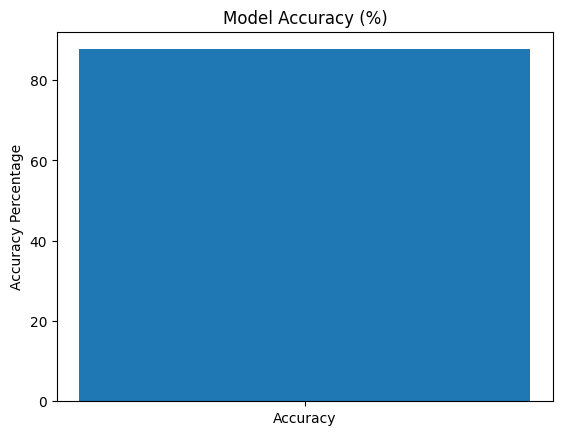

In [39]:
#Visualization :
import matplotlib.pyplot as plt
plt.figure()
plt.bar(["Accuracy"], [accuracy * 100])
plt.title("Model Accuracy (%)")
plt.ylabel("Accuracy Percentage")
plt.show()

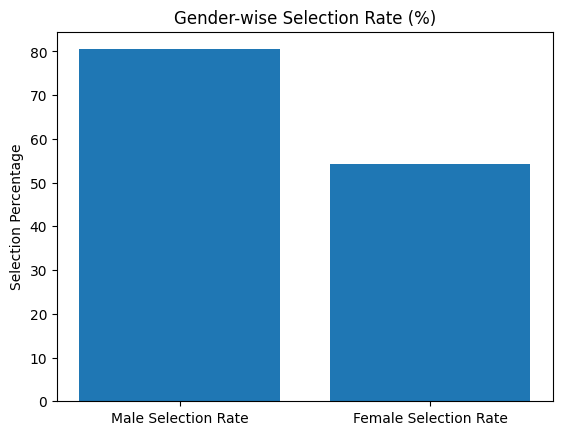

In [40]:
plt.figure()
plt.bar(["Male Selection Rate", "Female Selection Rate"],
        [male_selection_rate, female_selection_rate])
plt.title("Gender-wise Selection Rate (%)")
plt.ylabel("Selection Percentage")
plt.show()